# Cybersecurity Vertex Cover Patch Management Challenge for Tackling Kill Chains

_This tutorial is based on work submitted by Mark Carney in November 2022 [[1](#Patch)]._

The Min Vertex Cover (MVC) problem is a classical issue in graph theory and computer science, which aims to find a minimum set of vertices where each edge of the graph is incident to at least one vertex in the set.

Vulnerability graphs (related to attack graphs) showcase a method for solving significant cybersecurity problems with quantum computing using Classiq.

This tutorial suggests a method to prioritize patches by expressing the connectivity of various vulnerabilities on a network with a QUBO, then solving this with Classiq. Such a solution has the potential to effectively remove significant kill chains (paths to security compromise) within a given network leveraging a quantum computer.

## **Introduction**

Patch management is a common pain point for large-scale enterprises or widely distributed systems such as smartphones or IoT devices. Indeed, the lack of appropriate patching is indicated as a central cause for some high profile cybersecurity breaches. A variety of approaches have been proposed to improve the categorization and management of patches, including deep learning technologies.

This tutorial suggests a method of prioritizing patch management by analyzing vulnerability data on assets as a bipartite graph. Given that attacks are composed of 'kill chains'—which themselves comprise sequences of exploits leveraging vulnerabilities (that are coincident in our model)—this process suggests disconnecting vulnerability sequences, thereby significantly reducing potential kill chains in a given network.

This challenge, however, involves a known NP-hard problem. Leveraging quantum computation and optimization methods for vulnerability analysis of this kind opens new avenues of optimization of cybersecurity and related data for consideration.

**<div class="alert alert-success">The tutorial presents a method of prioritizing the patching of vulnerabilities by considering their connectivity and solving them using Classiq.</div>**

## **Bipartite Graph Representation**

The heart of the methodology represents vulnerabilities and assets as nodes in a bipartite graph.
Useful terminology:

### Kill Chains

A 'kill chain' is a multi-stage sequence of events that leads to the compromise of a network. Many of the examples of kill chains involve sequences of vulnerabilities, with the sequence dependent on the assets that intersect these vulnerabilities.

**Vulnerabilities:** Weaknesses in the system that result from an error in the design, implementation, or configuration of the operating system or an application software.

**Assets:** Items with value; for example, data stored in the system. The availability, consistency, and integrity of assets are to be preserved.

### Attack Graphs

'Attack graphs' feature in some interesting approaches to managing and mitigating security threats. They provide ways of analyzing network-oriented vulnerability data that many cybersecurity information sources generate.

Attack graphs are labeled transition systems that model adversary capabilities within a network and how they can be elevated by transitioning to new states via the exploitation of vulnerabilities (e.g., a weak password, a bug in a software package, or the ability to guess a stack address).

Attack graphs can discover paths that an adversary may use to escalate his privileges to compromise a given target (e.g., customer database or an administrator account). These sequences of possible vulnerabilities and asset pathways are commonly known as "kill chains." Kill chains depict comprehensive attack scenarios that outline the steps taken to target a specific critical asset.

<center><img src="https://docs.classiq.io/resources/Attack_graph.jpg" width=700/></center>

<div class="alert alert-info">Attack graph example</div>

### Vulnerability Graphs

A theoretical way of analyzing vulnerabilities on a computer network uses 'vulnerability graphs', derived from the notion of 'attack graphs'.

A graph $G = (V, E)$; $V(G)$ with a set of vertices and a set of edges $E(G) \in V \times V$, $E$ comprises pairs of elements from $V$.

A bipartite graph $G$ is a graph with a partition of $V(G)$ into two sets $A, B$ such that $\forall(a,b)\in E(G)$, $a\in A$ and $b\in B$.

**A vulnerability graph** $G$ is a bipartite graph where one partition of vertices represents network assets and the other represents vulnerabilities. The edges of $G$ represent a given asset affected by a detected vulnerability.

**A kill chain** is a sequence of vertices $K = {v1 , v2 , . . . v_n }$ from the vulnerability partition of a vulnerability graph $V$ such that for each $v_i, v_j \in K$ there exists at least one asset $a \in V$ with $(v_i,a),(v_j,a) \in E(G)$.

- Whilst the formulation in utilities directed graphs, for simplicity this tutorial uses undirected simple graphs to represent the same data.

- Note the lack of any information coded about severity ratings for vulnerabilities, e.g., CVSS scores. This methodology output is not considered as critical vulnerabilities (that should always be patched as soon as possible) but rather aims to find the issues that are widespread and sufficiently well connected to cause potential harm.

### Connectivity Dual Graphs

The dual graph $D_G$ is constructed as follows. For each vulnerability vertex $v_i \in V (G)$ for $1  \leq i \leq|V(G)|$:

1. Add $v_i$ to $V(D_G)$ if $v_i \in V(D_G)$.
2. Enumerate a list of asset vertices ${a0 , a1 , . . .}$ connected to $v_i$.
3. Iterating over this list of assets, for each $v_i' $ connected to each host $a_j$:
   1. Add $v_i'$ to $V (D_G)$.
   2. Add $(v_i,v_i')$ to $E(D_G)$.
   3. If $(v_i,v_i')$ already exists, add 1 to the weight of that edge.
4. Remove $v_i$ from $V (G)$ and continue with $v_i+1$.

The dual $D_G$ represents all of the connections between vulnerabilities on attack graphs.

### Removing Kill Chains with Vertex Covers

Removing the vertices in a vertex cover on $D_G$ from $V(G)$ leaves V totally disconnected on the vulnerability partition to itself via the host partition.

Removing every 'vulnerability-host-vulnerability' sub-path in a vulnerability graph $V$ by means of a minimum vertex cover on $D_G$, removes a significant number of kill chains $K$ found in the paths of $G$.

### Min Vertex Cover: Mathematical Formulation

The MVC problem can be formulated as an Integer Linear Program (ILP):

Minimize:
$\sum_{i \in V} x_i$

Subject to
$(1 - x_i)(1 - x_j)=0 \quad  \forall (i,j) \in E_0$

and
$x_i \in \{0, 1\} \quad \forall i \in V$

where

- $x_i$ is a binary variable that equals 1 if node $i$ is in the cover and 0 otherwise
- $E_0$ is the set of all edges (connected and not connected)
- $V$ is the set of vertices in the graph

**<div class="alert alert-success">By utilizing a quantum computing setup, you can efficiently solve an NP-hard problem, reducing the time required to find the most at-risk vulnerabilities and patching them with more priority. You can run iterations over security data more effectively with feedback from new information, thereby improving security.</div>**

## Toy Network Example

The following vulnerability graph $V$ has assets $a$ to $g$ and vulnerabilities $1$ through $8$:

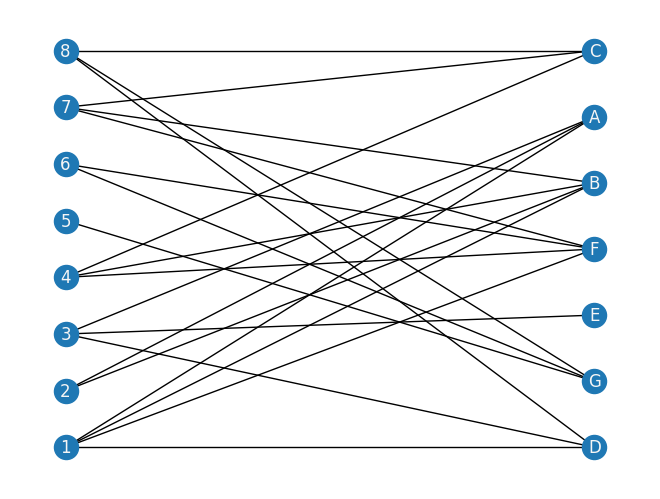

In [1]:
import networkx as nx

edge_dict = {
    1: ["A", "B", "D", "F"],
    2: ["A", "B"],
    3: ["A", "D", "E"],
    4: ["B", "C", "F"],
    5: ["G"],
    6: ["F", "G"],
    7: ["B", "C", "F"],
    8: ["C", "D", "G"],
}

B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8], bipartite=0)
B.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"], bipartite=1)
for u in range(1, 9):
    for v in edge_dict[u]:
        B.add_edge(u, v)
X, Y = nx.bipartite.sets(B)
nx.draw(B, pos=nx.bipartite_layout(B, X), with_labels=True, font_color="whitesmoke")

**<div class="alert alert-info">Above is the bipartite graph with vulnerabilities on the left and assets on the right.</div>**

An example of a kill chain path incorporated into the venerability graph:

<center><img src="https://docs.classiq.io/resources/Attack_path.png" width=700/></center>

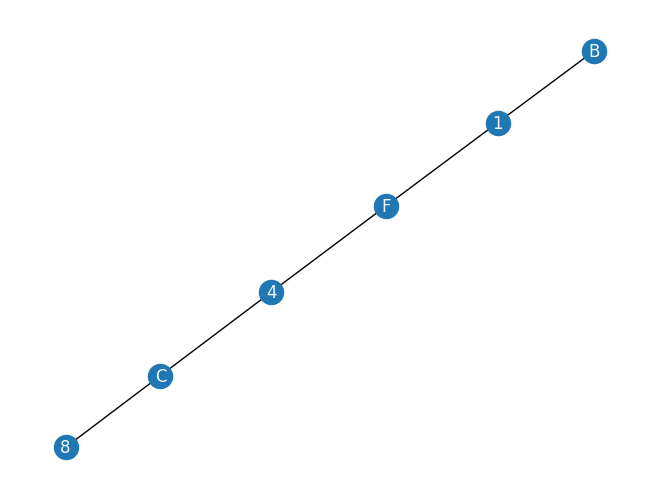

In [2]:
import networkx as nx

kill_chain_example_edge_dict = {1: ["B", "F"], 4: ["F", "C"], 8: ["C"]}

B_example = nx.Graph()
B_example.add_nodes_from([1, 4, 8], bipartite=0)
B_example.add_nodes_from(["B", "C", "F"], bipartite=1)
for u in [1, 4, 8]:
    for v in kill_chain_example_edge_dict[u]:
        B_example.add_edge(u, v)
nx.draw(B_example, with_labels=True, font_color="whitesmoke")

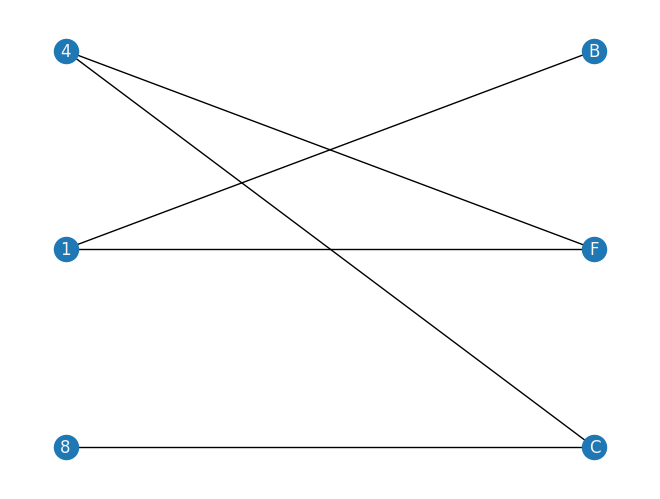

In [3]:
X, Y = nx.bipartite.sets(B_example)
nx.draw(
    B_example,
    pos=nx.bipartite_layout(B_example, X),
    with_labels=True,
    font_color="whitesmoke",
)

This graph leads to the following dual graph $DV$:

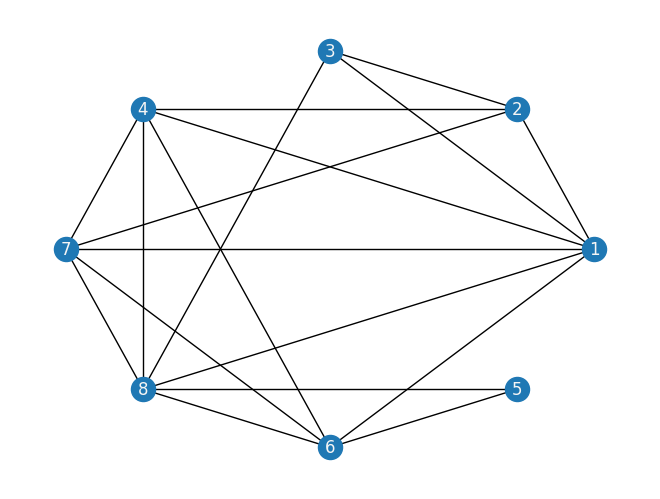

In [4]:
B_dual = nx.Graph()

B_2 = B.copy()

S, T = nx.bipartite.sets(B_2)
# nx.draw(B_2, pos=nx.bipartite_layout(B_2,S), with_labels=True)


# iterate over one side of the bipartite graph
# and construct the dual from the paper.
def gen_dual(B_2, S=None):
    B_2c = B_2.copy()
    DualG = nx.Graph()
    if not S:
        S, _ = nx.bipartite.sets(B_2c)
    for s in S:
        DualG.add_node(s)
        # iter over all nodes s talks to
        for t1 in B_2c.neighbors(s):
            for t2 in B_2c.neighbors(t1):
                if t2 != s:
                    DualG.add_edge(s, t2)
        B_2c.remove_node(s)
    return DualG


DG = gen_dual(B_2, S)
nx.draw(DG, pos=nx.circular_layout(DG), with_labels=True, font_color="whitesmoke")

**<div class="alert alert-info">Above is the dual graph for solving the MVC.</div>**

### Building the Optimization Model from Graph Input

To build the optimization model, use Pyomo, which is a Python-based, open-source optimization modeling language with a diverse set of optimization capabilities. Formalize the QUBO model into a Pyomo model object.

**Classiq seamlessly incorporates the Pyomo object into its model.**

Define the Pyomo model for building a Classiq model using the mathematical formulation defined above:

In [5]:
import networkx as nx
import pyomo.core as pyo


def mvc(graph: nx.Graph) -> pyo.ConcreteModel:
    model = pyo.ConcreteModel()
    model.x = pyo.Var(graph.nodes, domain=pyo.Binary)
    nodes = list(graph.nodes())

    @model.Constraint(graph.edges)
    def full_cover(model, i, j):
        # all sets are covered
        return ((1 - model.x[i]) * (1 - model.x[j])) == 0

    def obj_expression(model):
        # number of nodes selected
        return sum(model.x.values())

    model.cost = pyo.Objective(rule=obj_expression, sense=pyo.minimize)

    return model

The model contains

- a binary variable declaration for each node (model.x) indicating whether the variable is chosen for the set.
- a constraint rule ensuring that all edges are covered.
- an objective rule that minimizes the number of selected nodes.

In [6]:
mvc_model = mvc(DG)

In [7]:
mvc_model.pprint()

2 Set Declarations
    full_cover_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     2 :    Any :   18 : {(1, 2), (1, 3), (1, 4), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 7), (3, 8), (4, 6), (4, 7), (4, 8), (6, 5), (7, 6), (7, 8), (8, 5), (8, 6)}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    8 : {1, 2, 3, 4, 5, 6, 7, 8}

1 Var Declarations
    x : Size=8, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :     1 : False :  True : Binary
          2 :     0 :  None :     1 : False :  True : Binary
          3 :     0 :  None :     1 : False :  True : Binary
          4 :     0 :  None :     1 : False :  True : Binary
          5 :     0 :  None :     1 : False :  True : Binary
          6 :     0 :  None :     1 : False :  True : Binary
          7 :     0 :  None :     1 : False :  True : Bin

**You are set to go!**

## Solving MVC with Classiq and QAOA

Follow the steps of solving the problem with Classiq using the Quantum Approximate Optimization Algorithm (QAOA) [[2](#QAOA)].

QAOA is a quantum algorithm designed to solve combinatorial optimization problems, making it an ideal candidate for tackling the MVC problem in large scale WSNs.

Apply QAOA to the modeled graph, iteratively adjusting the parameters to navigate the solution space and identify the MVC. Quantum computing's unique ability to explore multiple solution candidates simultaneously accelerates the optimization process, significantly outperforming classical algorithms for complex problems.

To solve the Patching Prioritization Problem with Classiq: 

1. Build a Classiq model
2. Generate a parameterized quantum circuit
3. Execute the circuit and optimize the parameters to get the optimal solution

In [8]:
import classiq

# classiq.authenticate(overwrite=True)

### 1. Building a Classiq Model

To solve the Pyomo model defined above, use the Classiq combinatorial optimization engine. For the quantum part of the QAOA algorithm (`QAOAConfig`), define the number of repetitions (`num_layers`):

In [9]:
from classiq import construct_combinatorial_optimization_model
from classiq.applications.combinatorial_optimization import OptimizerConfig, QAOAConfig

qaoa_config = QAOAConfig(num_layers=1)

For the classical optimization part of the QAOA algorithm, define the classical optimization configuration through the `OptimizerConfig` object where the maximum number of classical iterations (`max_iteration`) and the $\alpha$-parameter (`alpha_cvar`) for running CVaR-QAOA—an improved variation of the QAOA algorithm [[3](#cvar)]—are defined:

In [10]:
optimizer_config = OptimizerConfig(max_iteration=60, alpha_cvar=0.9)

To solve the problem, load the model based on the problem and algorithm parameters:

**Classiq seamlessly incorporates the classical Pyomo optimization object into its model.**

In [11]:
qmod = construct_combinatorial_optimization_model(
    pyo_model=mvc_model,
    qaoa_config=qaoa_config,
    optimizer_config=optimizer_config,
)

The Classiq model (`Qmod`) already incorporates the QAOA execution logic. However, you can determine the quantum backend on which to execute so the Classiq synthesis engine can take it into consideration when generating an optimized quantum circuit:

In [12]:
from classiq import set_execution_preferences
from classiq.execution import ClassiqBackendPreferences, ExecutionPreferences

backend_preferences = ExecutionPreferences(
    backend_preferences=ClassiqBackendPreferences(backend_name="simulator")
)

qmod = set_execution_preferences(qmod, backend_preferences)

**<div class="alert alert-success">That's it! Your Classiq model is all set!!</div>**
Write the model to file and view all quantum configurations and execution logic.

In [13]:
from classiq import write_qmod

write_qmod(qmod, "patch_min_vertex_cover")

You can also load the above file to the Classiq web IDE for further analysis and ease of execution.

### 2. Generating a Parameterized Quantum Circuit

This step is simple. Synthesize your model and view the QAOA circuit (ansatz) used to solve the optimization problem:

In [14]:
from classiq import show, synthesize

qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/8826dbfa-6969-4307-8d84-deba26add946?version=0.41.0.dev39%2B79c8fd0855


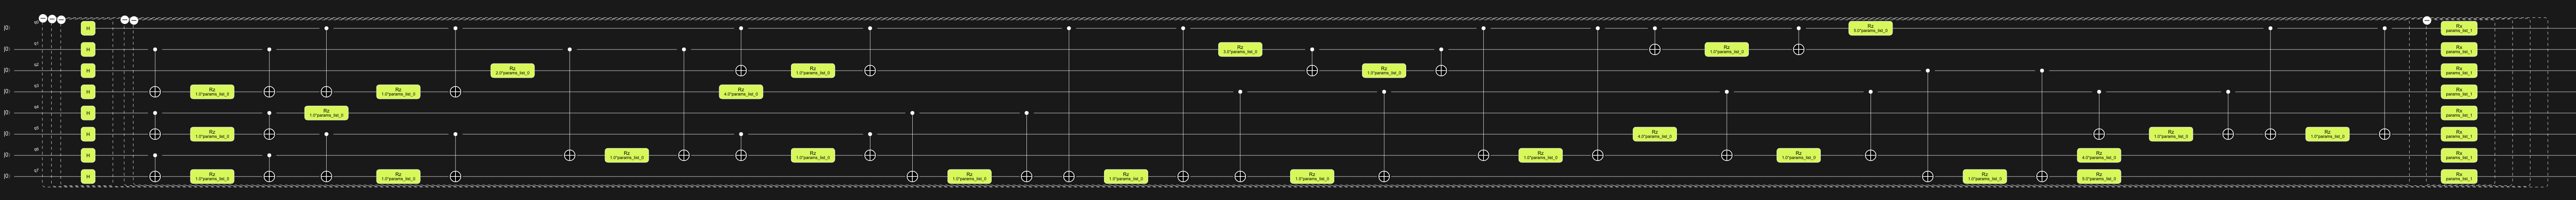

### 3. Executing the Circuit: Optimizing Parameters to get the Optimal Solution

To solve the problem using the generated quantum program, use the `execute` function:

In [15]:
from classiq import execute

result = execute(qprog).result_value()

### 4. Analyzing the Execution Results

Check the energy convergence through the iterations:

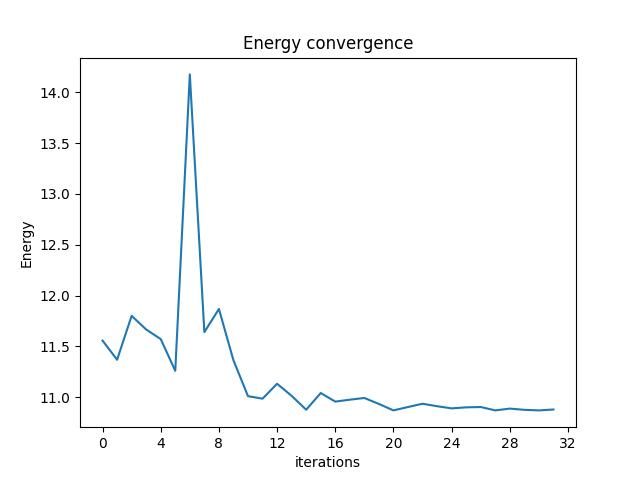

In [16]:
from classiq.execution import VQESolverResult

vqe_result = VQESolverResult.parse_obj(result)
vqe_result.convergence_graph

Examine the optimization results statistics of the algorithm:

In [17]:
import pandas as pd

from classiq.applications.combinatorial_optimization import (
    get_optimization_solution_from_pyo,
)

solution = get_optimization_solution_from_pyo(
    mvc_model, vqe_result=vqe_result, penalty_energy=qaoa_config.penalty_energy
)

optimization_result = pd.DataFrame.from_records(solution)
optimization_result.sort_values(by="cost", ascending=True).head(5)

,probability,cost,solution,count
202,0.001,5.0,"[1, 1, 0, 0, 0, 1, 1, 1]",1
198,0.001,5.0,"[1, 1, 0, 1, 0, 1, 0, 1]",1
14,0.011,6.0,"[1, 1, 0, 0, 0, 1, 0, 1]",11
141,0.002,6.0,"[1, 1, 0, 1, 0, 1, 1, 1]",2
113,0.003,6.0,"[1, 1, 0, 1, 1, 0, 1, 1]",3


View the histogram:

array([[<Axes: title={'center': 'cost'}>]], dtype=object)

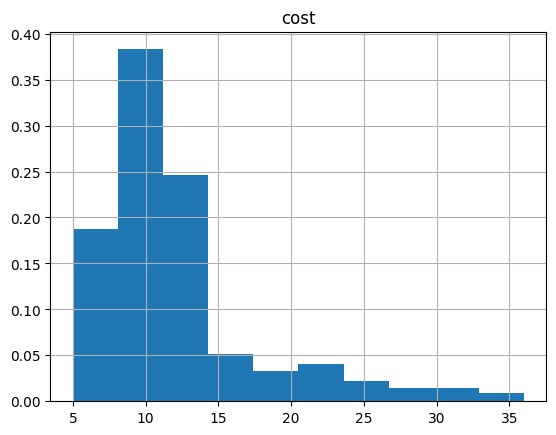

In [18]:
optimization_result.hist("cost", weights=optimization_result["probability"])

Plot the optimal solution:

In [19]:
best_solution = optimization_result.solution[optimization_result.cost.idxmin()]

In [20]:
best_solution

[1, 1, 0, 1, 0, 1, 0, 1]

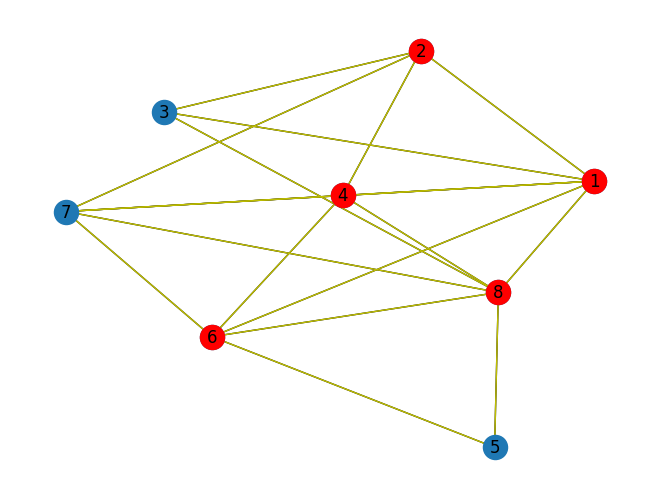

In [21]:
def draw_solution(graph: nx.Graph, solution: list):
    solution_nodes = [v for v in graph.nodes if solution[v - 1]]
    solution_edges = [
        (u, v) for u, v in graph.edges if u in solution_nodes or v in solution_nodes
    ]
    nx.draw_kamada_kawai(graph, with_labels=True)
    nx.draw_kamada_kawai(
        graph,
        nodelist=solution_nodes,
        edgelist=solution_edges,
        node_color="r",
        edge_color="y",
    )


draw_solution(DG, best_solution)

**<div class="alert alert-success">You obtained a set of vertices that form the minimum vertex cover.</div>**

Remove these nodes from the original vulnerability graph $V$:

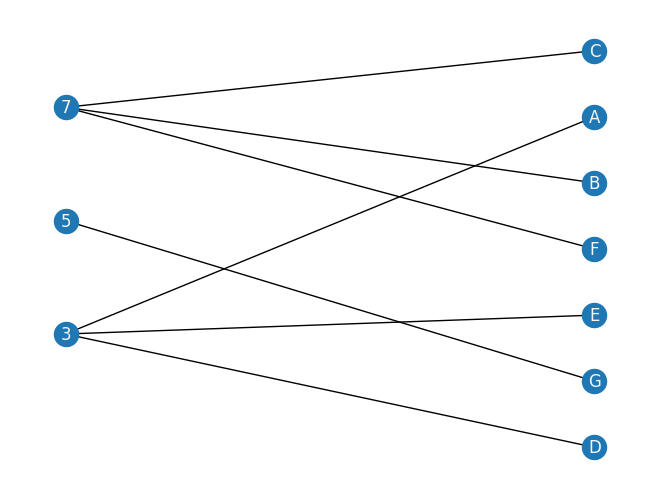

In [22]:
check_B = B.copy()
vc2 = [v for v in DG.nodes if best_solution[v - 1]]
for v in vc2:
    check_B.remove_node(v)

nx.draw(
    check_B,
    pos=nx.bipartite_layout(check_B, S),
    with_labels=True,
    font_color="whitesmoke",
)

**<div class="alert alert-success">Given that the MVCV vulnerability nodes are patched, the rest of the vulnerabilities are disconnected from one other. This significantly breaks most of the network kill chains.</div>**

## Larger Scale Models

TBD

**<div class="alert alert-success">The leveraging of short term solutions for NP-hard problems that are present in cybersecurity data is a potentially rich vein of exciting possibilities. The fast and efficient resolution of cybersecurity data problems also helps reduce the analysis and reaction times of security teams.</div>**


## References

<a id='Patch'>[1]</a> [Cutting Medusa's Path -- Tackling Kill-Chains with Quantum Computing.](https://arxiv.org/abs/2211.13740)

<a id='QAOA'>[2]</a> [Farhi, Edward, Jeffrey Goldstone, and Sam Gutmann. "A quantum approximate optimization algorithm." arXiv preprint arXiv:1411.4028 (2014).](https://arxiv.org/abs/1411.4028)

<a id='cvar'>[3]</a> [Barkoutsos, Panagiotis Kl, et al. "Improving variational quantum optimization using CVaR." Quantum 4 (2020): 256.](https://arxiv.org/abs/1907.04769)
